# FASHION-MNIST DATASET


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.callbacks import CSVLogger, ModelCheckpoint, TensorBoard
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, ReLU, Softmax
from keras.losses import SparseCategoricalCrossentropy
from keras.metrics import SparseCategoricalAccuracy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Fashion-MNIST is a dataset of images consisting of 10 different fashion categories, with 60,000 training images and 10,000 test images. Each image is a 28x28 grayscale image, and the goal is to correctly classify each image into its corresponding fashion category. The Fashion-MNIST dataset is often used as a drop-in replacement for the original MNIST dataset, as it is more challenging and better represents real-world computer vision tasks.


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

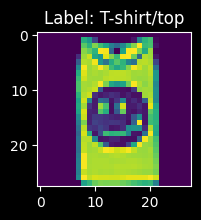

In [8]:
def plot_sample(index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_train[index])
    plt.title("Label: {}".format(class_names[y_train[index]]))


plot_sample(101)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## ANN


In [10]:
ann = Sequential(
    layers=[Input(shape=(28, 28)), Flatten(), Dense(128), ReLU(), Dense(10), Softmax()],
    name="ann",
)

In [11]:
ann.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <ReLU name=re_lu, built=True>,
 <Dense name=dense_1, built=True>,
 <Softmax name=softmax, built=True>]

In [12]:
ann.summary()

Model: "ann"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
ann.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

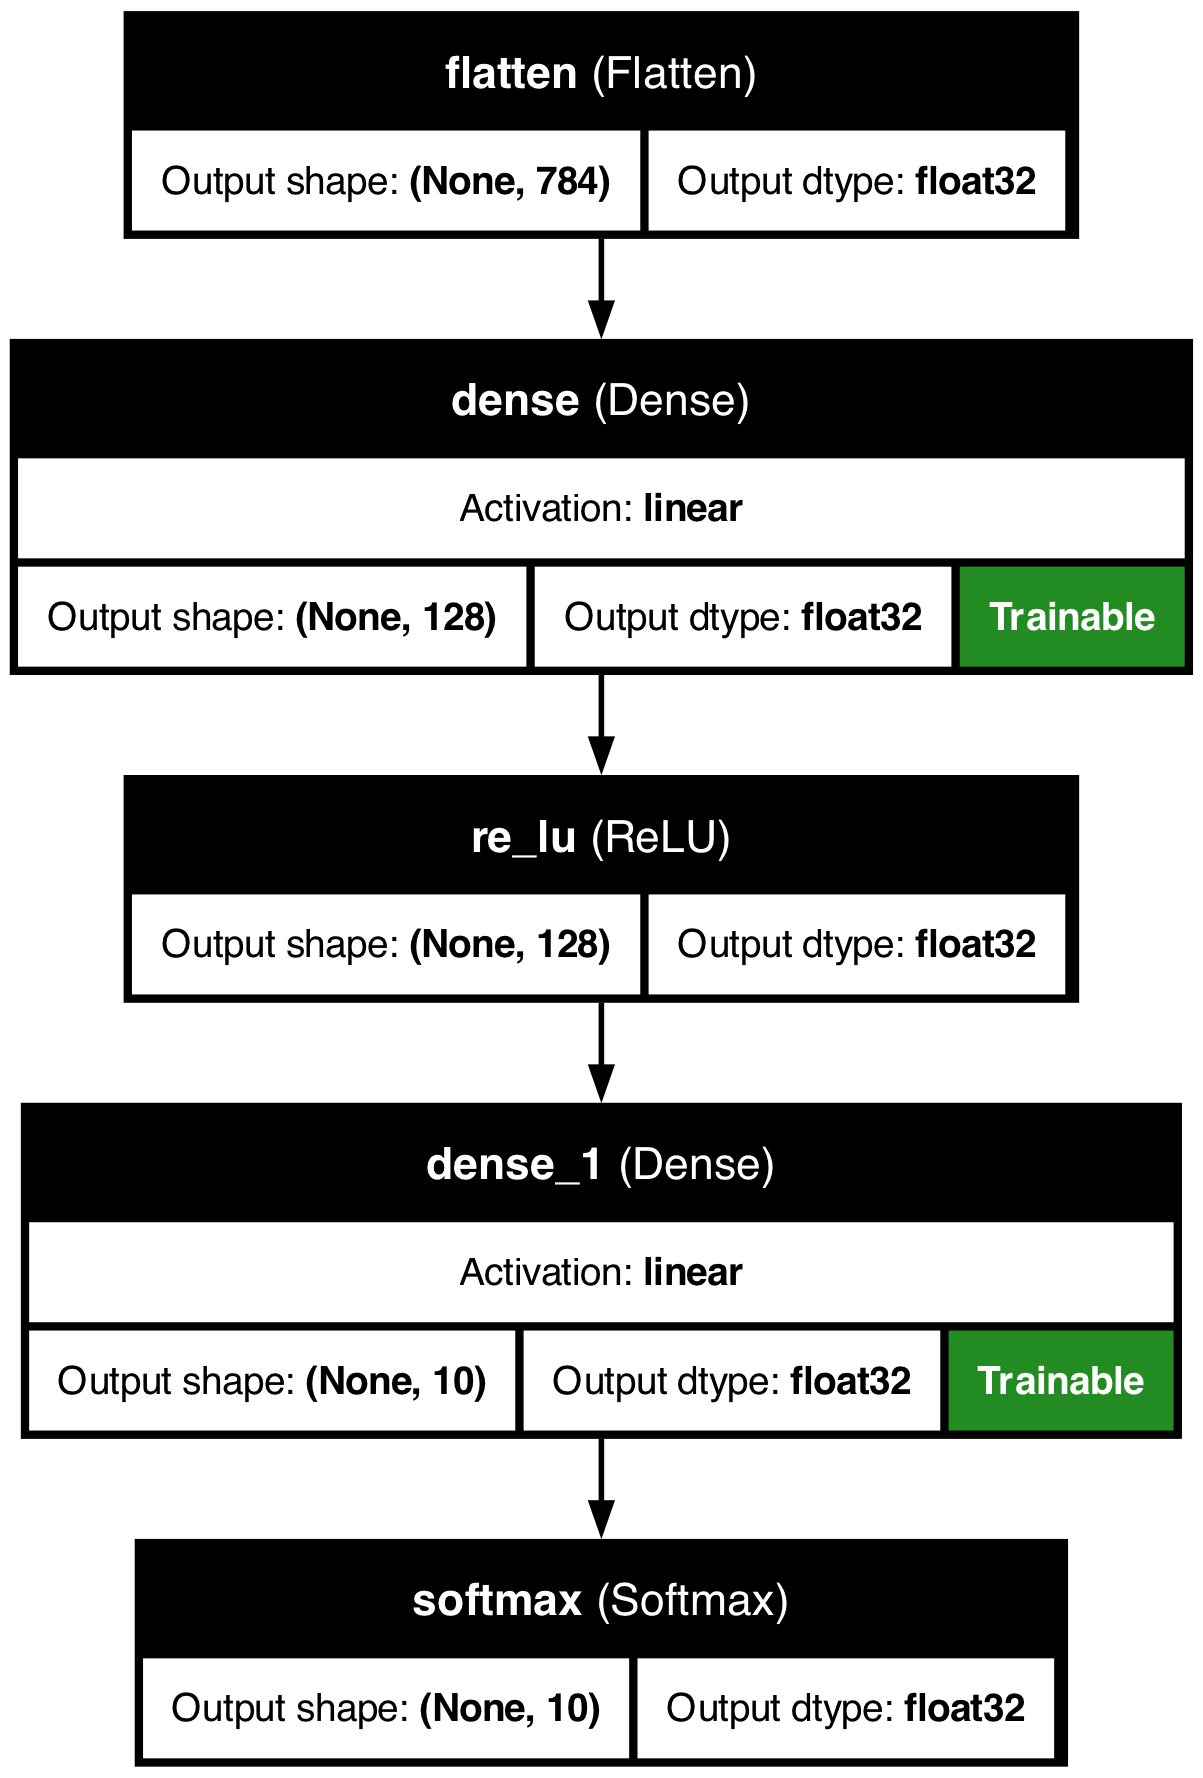

In [14]:
plot_model(
    ann,
    to_file="../Images/fashion-mnist_ann.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [15]:
ann_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/fashion-mnist_ann.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
ann_tensorboard_callback = TensorBoard(
    log_dir="../Logs/fashion-mnist_ann_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/fashion-mnist_ann_logs"

ann_csvlogger_callback = CSVLogger("../Logs/fashion-mnist_ann_logs.csv")

ann_history = ann.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[
        ann_checkpoint_callback,
        ann_tensorboard_callback,
        ann_csvlogger_callback,
    ],
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7108 - sparse_categorical_accuracy: 0.7569 - val_loss: 0.4317 - val_sparse_categorical_accuracy: 0.8508
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4164 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.3900 - val_sparse_categorical_accuracy: 0.8625
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3691 - sparse_categorical_accuracy: 0.8683 - val_loss: 0.3600 - val_sparse_categorical_accuracy: 0.8733
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3365 - sparse_categorical_accuracy: 0.8771 - val_loss: 0.3482 - val_sparse_categorical_accuracy: 0.8752
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3130 - sparse_categorical_accuracy: 0.8866 - val_loss: 0.3620 - val_sparse_categorical_accuracy: 0.8718


In [16]:
ann_train_loss = ann_history.history["loss"]
ann_train_acc = ann_history.history["sparse_categorical_accuracy"]
ann_val_loss = ann_history.history["val_loss"]
ann_val_acc = ann_history.history["val_sparse_categorical_accuracy"]

print("Training loss:", np.mean(ann_train_loss))
print("Validation loss:", np.mean(ann_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(ann_train_acc), np.std(ann_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(ann_val_acc), np.std(ann_val_acc))
)

Training loss: 0.3925265371799469
Validation loss: 0.37838619351387026
0.860258 Training accuracy with a standard deviation of 0.025819
0.866717 Validation accuracy with a standard deviation of 0.009100


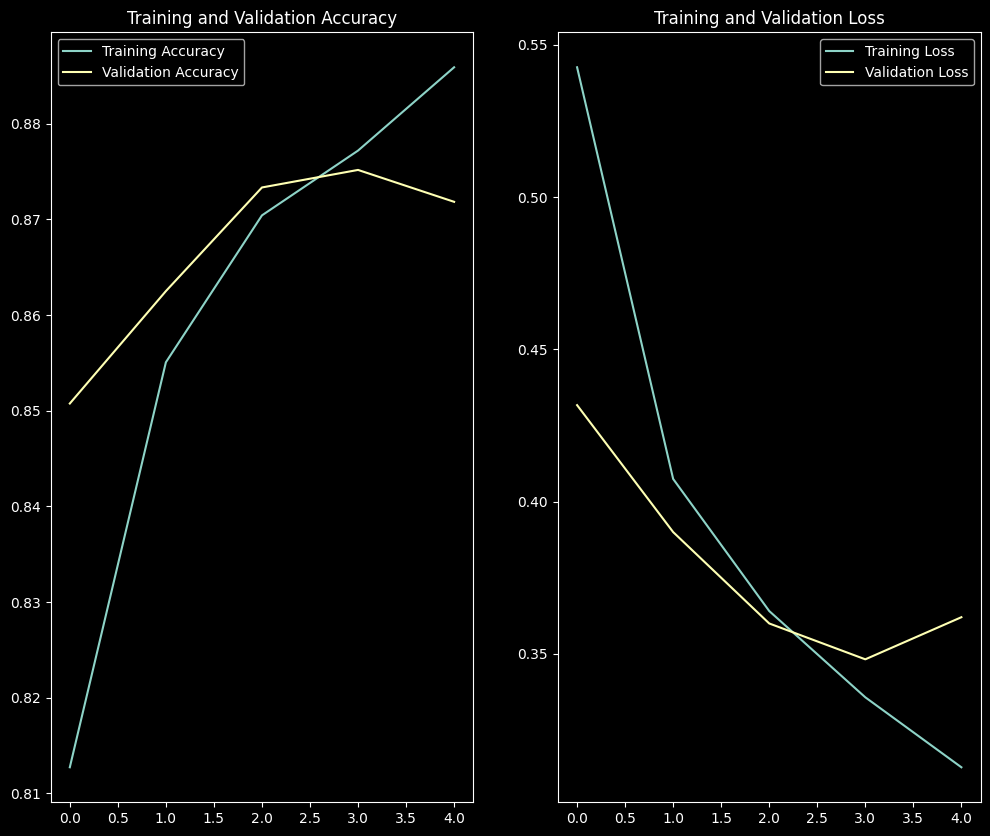

In [17]:
epochs_range = range(5)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, ann_train_acc, label="Training Accuracy")
plt.plot(epochs_range, ann_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, ann_train_loss, label="Training Loss")
plt.plot(epochs_range, ann_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/fashion-mnist_ann_acc_loss.png", bbox_inches="tight")

In [18]:
ann_test_loss, ann_test_accuracy = ann.evaluate(X_test, y_test)
print("Test loss:", ann_test_loss)
print("Test accuracy:", ann_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - loss: 0.3728 - sparse_categorical_accuracy: 0.8695
Test loss: 0.3874642848968506
Test accuracy: 0.8621000051498413


In [19]:
y_pred = ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step


## CNN


In [20]:
cnn = Sequential(
    layers=[
        Input(shape=(28, 28, 1)),
        Conv2D(filters=32, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Conv2D(filters=64, kernel_size=3, padding="same", strides=1),
        ReLU(),
        MaxPooling2D(pool_size=2, strides=2),
        Flatten(),
        Dense(128),
        ReLU(),
        Dense(10),
        Softmax(),
    ],
    name="cnn",
)

In [21]:
cnn.layers

[<Conv2D name=conv2d, built=True>,
 <ReLU name=re_lu_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <ReLU name=re_lu_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <ReLU name=re_lu_3, built=True>,
 <Dense name=dense_3, built=True>,
 <Softmax name=softmax_1, built=True>]

In [22]:
cnn.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_1 (Softmax)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
cnn.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=[SparseCategoricalAccuracy()],
)

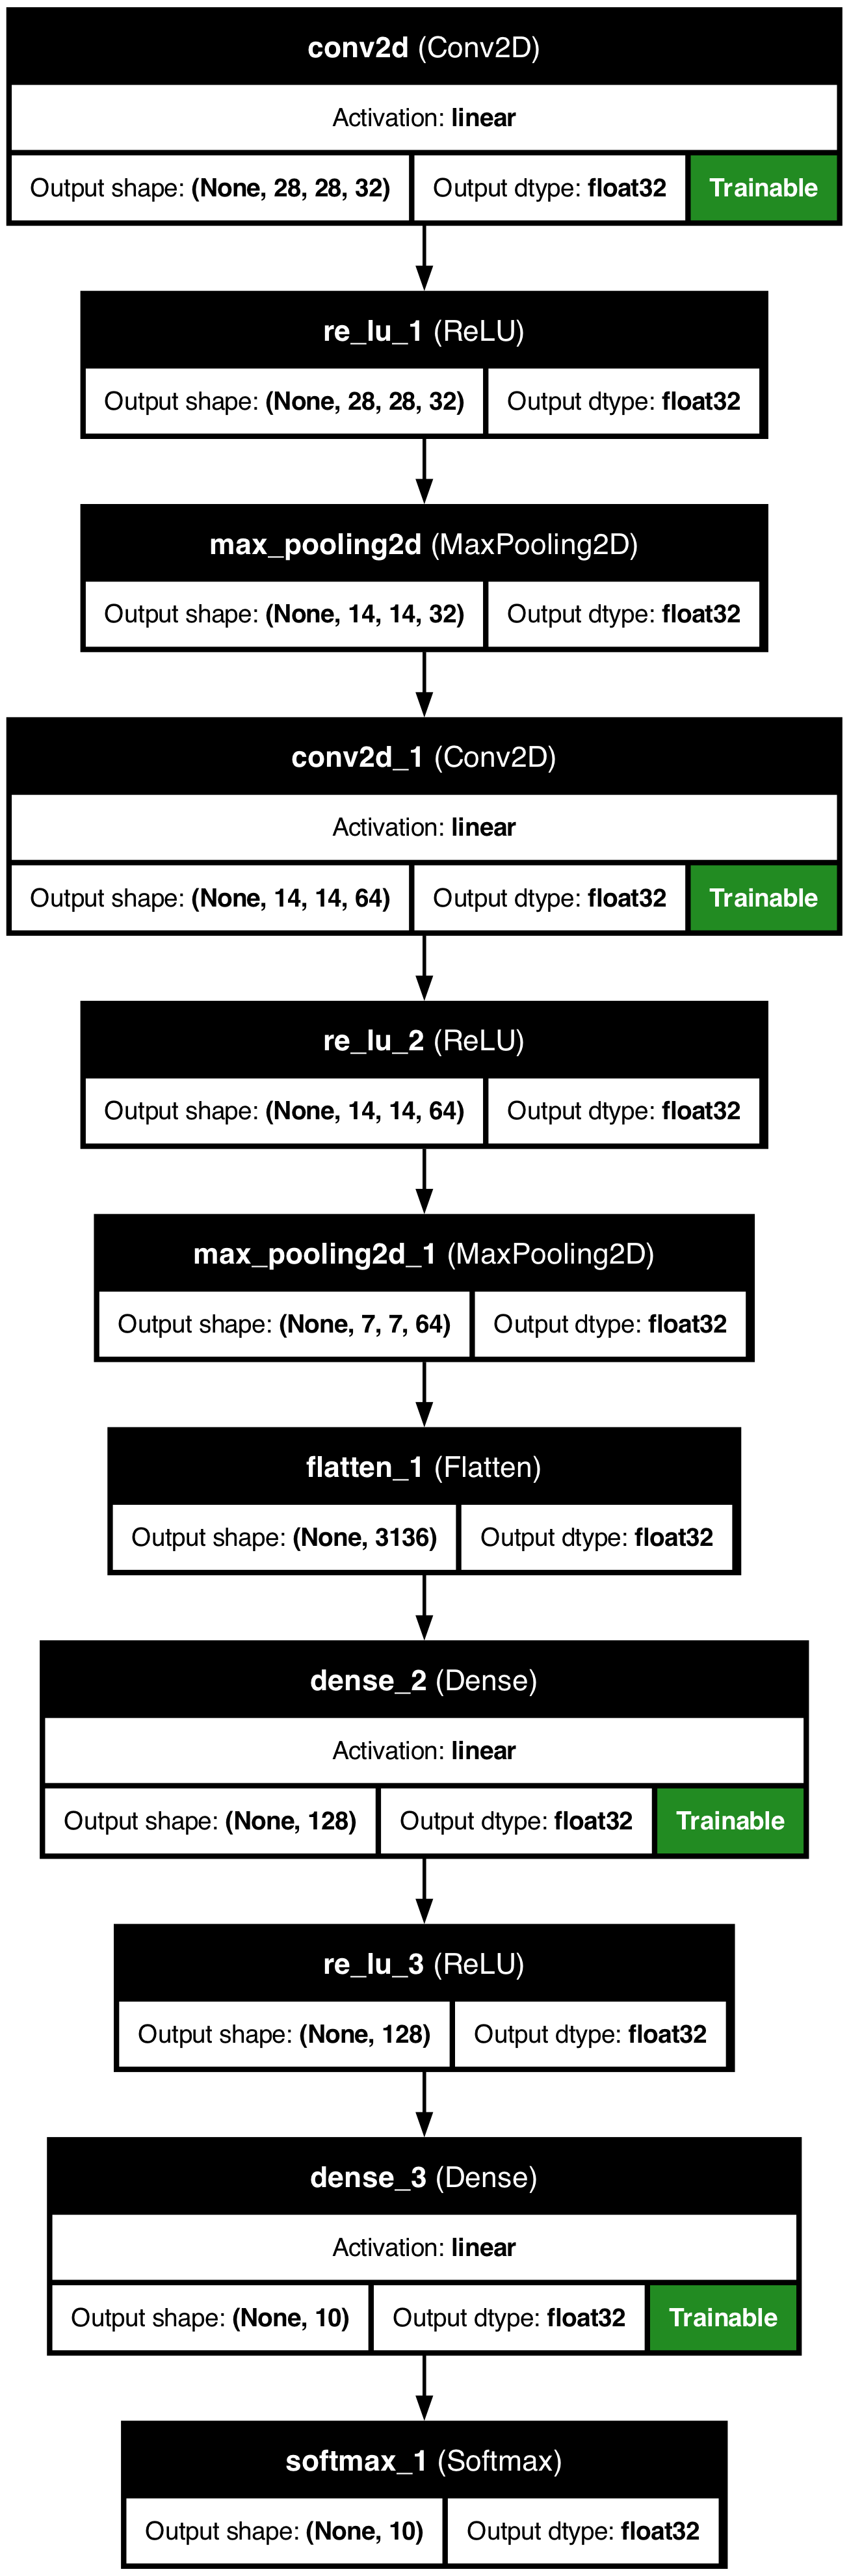

In [24]:
plot_model(
    cnn,
    to_file="../Images/fashion-mnist_cnn.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    show_trainable=True,
)

In [25]:
cnn_checkpoint_callback = ModelCheckpoint(
    filepath="../Models/fashion-mnist_cnn.keras",
    monitor="val_loss",
    save_best_only=True,
    mode="min",
)
cnn_tensorboard_callback = TensorBoard(
    log_dir="../Logs/fashion-mnist_cnn_logs",
    histogram_freq=1,
    write_images=True,
    write_steps_per_second=True,
)
# tensorboard --logdir="Logs/fashion-mnist_cnn_logs"

cnn_csvlogger_callback = CSVLogger("../Logs/fashion-mnist_cnn_logs.csv")

cnn_history = cnn.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=5,
    validation_split=0.2,
    callbacks=[
        cnn_checkpoint_callback,
        cnn_tensorboard_callback,
        cnn_csvlogger_callback,
    ],
)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - loss: 0.6371 - sparse_categorical_accuracy: 0.7716 - val_loss: 0.3236 - val_sparse_categorical_accuracy: 0.8827
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - loss: 0.3015 - sparse_categorical_accuracy: 0.8924 - val_loss: 0.2965 - val_sparse_categorical_accuracy: 0.8911
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - loss: 0.2484 - sparse_categorical_accuracy: 0.9092 - val_loss: 0.2496 - val_sparse_categorical_accuracy: 0.9089
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - loss: 0.2207 - sparse_categorical_accuracy: 0.9197 - val_loss: 0.2435 - val_sparse_categorical_accuracy: 0.9103
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 34ms/step - loss: 0.1923 - sparse_categorical_accuracy: 0.9302 - val_loss: 0.2349 - val_sparse_categorical_accuracy: 0.9143


In [26]:
cnn_train_loss = cnn_history.history["loss"]
cnn_train_acc = cnn_history.history["sparse_categorical_accuracy"]
cnn_val_loss = cnn_history.history["val_loss"]
cnn_val_acc = cnn_history.history["val_sparse_categorical_accuracy"]


print("Training loss:", np.mean(cnn_train_loss))
print("Validation loss:", np.mean(cnn_val_loss))
print(
    "%f Training accuracy with a standard deviation of %f"
    % (np.mean(cnn_train_acc), np.std(cnn_train_acc))
)
print(
    "%f Validation accuracy with a standard deviation of %f"
    % (np.mean(cnn_val_acc), np.std(cnn_val_acc))
)

Training loss: 0.2798015832901001
Validation loss: 0.26962622404098513
0.898529 Training accuracy with a standard deviation of 0.032854
0.901483 Validation accuracy with a standard deviation of 0.012311


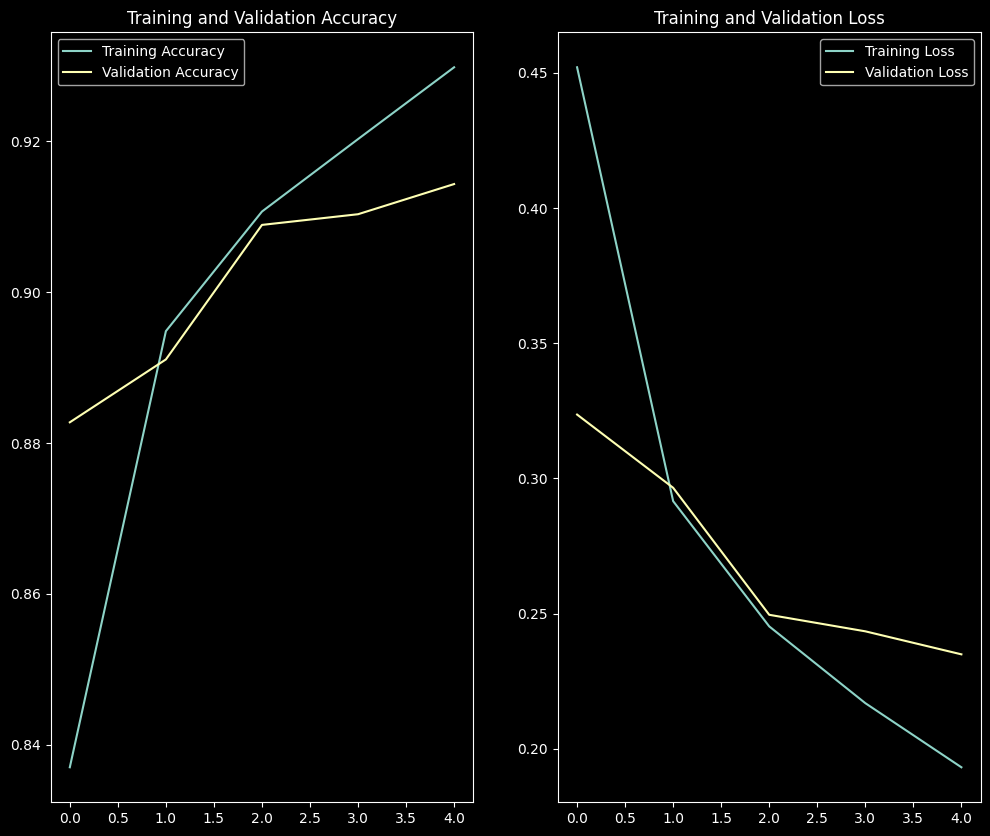

In [27]:
epochs_range = range(5)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, cnn_train_acc, label="Training Accuracy")
plt.plot(epochs_range, cnn_val_acc, label="Validation Accuracy")
plt.legend(loc="best")
plt.title("Training and Validation Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, cnn_train_loss, label="Training Loss")
plt.plot(epochs_range, cnn_val_loss, label="Validation Loss")
plt.legend(loc="best")
plt.title("Training and Validation Loss")

plt.savefig("../Images/fashion-mnist_cnn_acc_loss.png", bbox_inches="tight")

In [28]:
cnn_test_loss, cnn_test_accuracy = cnn.evaluate(X_test, y_test)
print("Test loss:", cnn_test_loss)
print("Test accuracy:", cnn_test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2598 - sparse_categorical_accuracy: 0.9076
Test loss: 0.2551850974559784
Test accuracy: 0.9082000255584717


In [29]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
